In [1]:
!pip install -Uqq fastbook

In [2]:
from fastbook import *

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [10]:
url = search_images_ddg('dog', max_images = 1)[0]
url

'https://wallpaperaccess.com/full/2229963.jpg'

In [11]:
download_url(url, Path('dog.jpg'))

Path('dog.jpg')

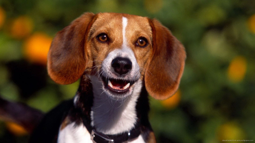

In [12]:
Image.open('dog.jpg').to_thumb(255, 255)

In [13]:
download_url(search_images_ddg('cat', max_images = 1)[0], Path('cat.jpg'))

Path('cat.jpg')

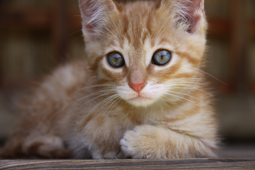

In [14]:
Image.open('cat.jpg').to_thumb(255, 255)

In [15]:
searches = 'dog', 'cat'
path = Path('images')

for i in searches:
    dest = path / i
    dest.mkdir(parents = True, exist_ok = True)
    download_images(dest, urls = search_images_ddg(i))
    resize_images(dest, max_size = 400, dest = dest)

/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [20]:
len(list(path.glob('*/*')))

386

In [21]:
len(list(path.glob('cat/*')))

196

In [22]:
len(list(path.glob('dog/*')))

190

In [23]:
failed = verify_images(get_image_files(path))
len(failed)

22

In [24]:
failed.map(Path.unlink)

(#22) [None,None,None,None,None,None,None,None,None,None...]

In [25]:
len(list(path.glob('*/*')))

364

In [32]:
def is_cat(path):
    print(parent_label(path))

In [34]:
dls = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files, 
    splitter = RandomSplitter(valid_pct = 0.2, seed = 42),
    get_y = parent_label,
    item_tfms = [Resize(192, 'squish')]
).dataloaders(path, bs = 32)

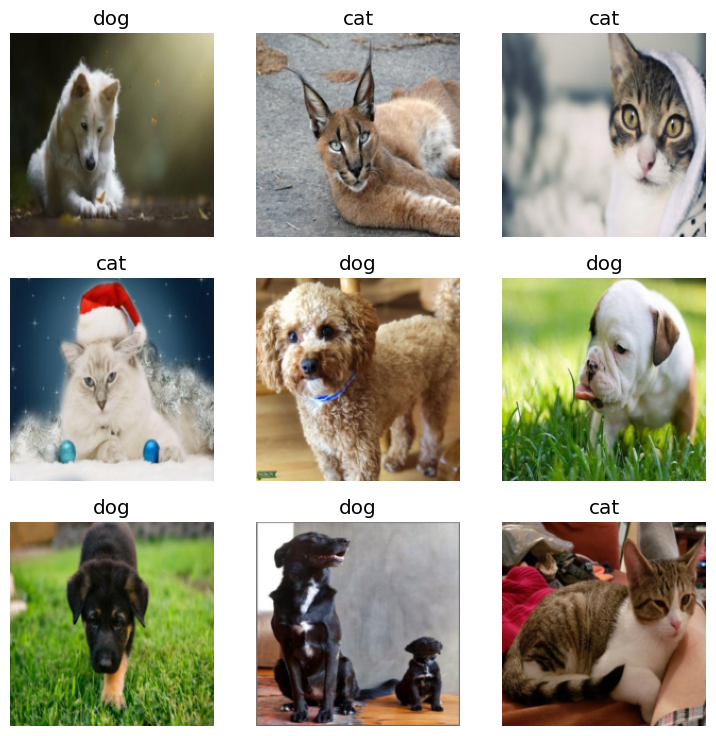

In [35]:
dls.show_batch()

In [37]:
learn = vision_learner(dls, resnet18, metrics = error_rate)
learn.fine_tune(1)

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 186MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.805198,0.301261,0.097222,00:07


epoch,train_loss,valid_loss,error_rate,time
0,0.287036,0.361123,0.125000,00:03


In [38]:
learn.predict('dog.jpg')

('dog', tensor(1), tensor([6.5588e-04, 9.9934e-01]))

In [39]:
learn.predict('cat.jpg')

('cat', tensor(0), tensor([1.0000e+00, 2.1536e-06]))

In [40]:
data = untar_data(URLs.PETS)

In [48]:
len(list(data.glob('images/*')))

7393

In [52]:
list(data.glob('annotations/*'))

[Path('/root/.fastai/data/oxford-iiit-pet/annotations/xmls'),
 Path('/root/.fastai/data/oxford-iiit-pet/annotations/README'),
 Path('/root/.fastai/data/oxford-iiit-pet/annotations/._trimaps'),
 Path('/root/.fastai/data/oxford-iiit-pet/annotations/list.txt'),
 Path('/root/.fastai/data/oxford-iiit-pet/annotations/test.txt'),
 Path('/root/.fastai/data/oxford-iiit-pet/annotations/trainval.txt'),
 Path('/root/.fastai/data/oxford-iiit-pet/annotations/trimaps')]

In [57]:
text = []
with open('/root/.fastai/data/oxford-iiit-pet/annotations/README', 'r') as f:
    text.append(f.read())
text

['OXFORD-IIIT PET Dataset\n-----------------------\nOmkar M Parkhi, Andrea Vedaldi, Andrew Zisserman and C. V. Jawahar\n\nWe have created a 37 category pet dataset with roughly 200 images for each class. \nThe images have a large variations in scale, pose and lighting. All images have an \nassociated ground truth annotation of breed, head ROI, and pixel\nlevel trimap segmentation.\n\nContents:\n--------\ntrimaps/ \tTrimap annotations for every image in the dataset\n\t\tPixel Annotations: 1: Foreground 2:Background 3: Not classified\nxmls/\t\tHead bounding box annotations in PASCAL VOC Format\n\nlist.txt\tCombined list of all images in the dataset\n\t\tEach entry in the file is of following nature:\n\t\tImage CLASS-ID SPECIES BREED ID\n\t\tID: 1:37 Class ids\n\t\tSPECIES: 1:Cat 2:Dog\n\t\tBREED ID: 1-25:Cat 1:12:Dog\n\t\tAll images with 1st letter as captial are cat images while\n\t\timages with small first letter are dog images.\ntrainval.txt\tFiles describing splits used in the paper.

In [68]:
def is_cat(path):
    return 'cat' if path[0].isupper() else 'dog'

In [74]:
dls2 = ImageDataLoaders.from_name_func(
    path = data,
    fnames = get_image_files(data/'images'),
    label_func = is_cat,
    seed = 42,
    item_tfms = [Resize(224, 'squish')]
)

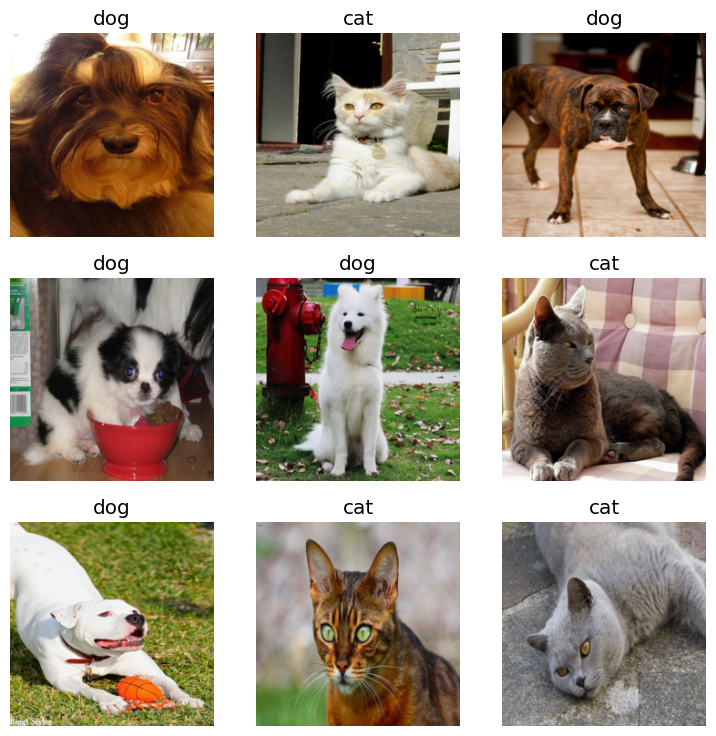

In [75]:
dls2.show_batch()

In [77]:
learn2 = vision_learner(dls2, resnet18, metrics = error_rate)
learn2.fine_tune(3)

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,0.173389,0.079934,0.027740,01:04


epoch,train_loss,valid_loss,error_rate,time
0,0.051414,0.117313,0.030447,01:04
1,0.027539,0.047274,0.010825,01:01
2,0.011258,0.034190,0.009472,01:08


In [79]:
learn2.predict('cat.jpg')

('cat', tensor(0), tensor([1.0000e+00, 3.8103e-14]))

In [80]:
learn2.predict('dog.jpg')

('dog', tensor(1), tensor([6.3404e-05, 9.9994e-01]))